# RAG for Data Science interview preparation

In [1]:
!pip install sentence_transformer

ERROR: Could not find a version that satisfies the requirement sentence_transformer (from versions: none)
ERROR: No matching distribution found for sentence_transformer


In [37]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import auto

In [38]:
model = SentenceTransformer('all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\mary\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mary\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [39]:
ds = pd.read_csv('data/db.csv')
ds

,section,question,answer
0,Classic_models,What are various ways to predict a binary resp...,"Things to look at: N, P, linearly seperable?, ..."
1,Classic_models,What methods for solving linear regression do ...,"To solve linear regression, you need to find t..."
2,Classic_models,Nearest Neighbors Method,The nearest neighbors method (k-Nearest Neighb...
3,Classic_models,Nearest Neighbors Method in Real Applications,k-NN can serve as a good starting point (basel...
4,Classic_models,Pros and Cons of The nearest neighbors method,Pros:\nSimple implementation;\nWell studied;\n...
...,...,...,...
185,Statistics,If you had draws from a normal distribution wi...,A question like this tests your knowledge of t...
186,Statistics,How do you transform a Skewed Distribution int...,To transform a Skewed Distribution into a Norm...
187,Statistics,What's the difference between Binomial Distrib...,The Binomial distribution describes the probab...
188,Statistics,Bayesian Inference,Focusing solely on some statistic of the poste...


In [40]:
ds['q+a'] = ds['question'] + ' ' + ds['answer']
ds

,section,question,answer,q+a
0,Classic_models,What are various ways to predict a binary resp...,"Things to look at: N, P, linearly seperable?, ...",What are various ways to predict a binary resp...
1,Classic_models,What methods for solving linear regression do ...,"To solve linear regression, you need to find t...",What methods for solving linear regression do ...
2,Classic_models,Nearest Neighbors Method,The nearest neighbors method (k-Nearest Neighb...,Nearest Neighbors Method The nearest neighbors...
3,Classic_models,Nearest Neighbors Method in Real Applications,k-NN can serve as a good starting point (basel...,Nearest Neighbors Method in Real Applications ...
4,Classic_models,Pros and Cons of The nearest neighbors method,Pros:\nSimple implementation;\nWell studied;\n...,Pros and Cons of The nearest neighbors method ...
...,...,...,...,...
185,Statistics,If you had draws from a normal distribution wi...,A question like this tests your knowledge of t...,If you had draws from a normal distribution wi...
186,Statistics,How do you transform a Skewed Distribution int...,To transform a Skewed Distribution into a Norm...,How do you transform a Skewed Distribution int...
187,Statistics,What's the difference between Binomial Distrib...,The Binomial distribution describes the probab...,What's the difference between Binomial Distrib...
188,Statistics,Bayesian Inference,Focusing solely on some statistic of the poste...,Bayesian Inference Focusing solely on some sta...


In [41]:
ds = ds.reset_index().rename(columns={'index': 'id'})

In [42]:
stats = ds.to_dict('records')

Let's encode the field, containing question and answer, into vector, so we can use it for the search:

In [43]:
for record in auto.tqdm(stats):
    record['q+a_vector'] = model.encode(record["q+a"])

  0%|          | 0/190 [00:00<?, ?it/s]

In [44]:
import pickle

with open('data/ds.pkl', 'wb') as f:
    pickle.dump(stats, f)

In [45]:
from elasticsearch import Elasticsearch
es_client = Elasticsearch('http://localhost:9200') 

es_client.info()

ObjectApiResponse({'name': 'd1afa5160e88', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'fkNVUkexQDeCEklNcE3vug', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [46]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "id": {"type": "keyword"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "answer": {"type": "text"},
            "q+a_vector": {"type": "dense_vector", "dims": 768, "index": True, "similarity": "cosine"},
        }
    }
}

In [47]:
index_name = "data_science_db"

es_client.indices.delete(index=index_name, ignore_unavailable=True)
es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'data_science_db'})

In [48]:
for doc in auto.tqdm(stats):
    try:
        es_client.index(index=index_name, document=doc)
    except Exception as e:
        print(e)

  0%|          | 0/190 [00:00<?, ?it/s]

In [49]:
es_client.indices.refresh(index=index_name)
es_client.cat.count(index=index_name, format="json")

ListApiResponse([{'epoch': '1723824395', 'timestamp': '16:06:35', 'count': '190'}])

In [50]:
search_term = "What is LDA?"
vector_search_term = model.encode(search_term)

In [51]:
query = {
    "field": "q+a_vector",
    "query_vector": vector_search_term,
    "k": 1,
    "num_candidates": 100, 
}

In [52]:
res = es_client.search(index=index_name, knn=query, source=["section", "question", "answer"])
res["hits"]["hits"]

[{'_index': 'data_science_db',
  '_id': 'XSjwW5EBxOWbIxg8pPFy',
  '_score': 0.79996276,
  '_ignored': ['q+a.keyword'],
  '_source': {'question': 'Linear Discriminant Analysis',
   'answer': 'Linear discriminant analysis is used as a tool for classification, dimension reduction, and data visualization. It has been around for quite some time now. Despite its simplicity, LDA often produces robust, decent, and interpretable classification results. When tackling real-world classification problems, LDA is often the benchmarking method before other more complicated and flexible ones are employed.\n',
   'section': 'Classic_models'}}]

In [53]:
# API_TOKEN = '...'

In [131]:
!pip install -U --user "huggingface_hub[cli]"

In [20]:
!huggingface-cli login --token=$API_TOKEN

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\mary\.cache\huggingface\token
Login successful


In [54]:
import requests
headers = {"Authorization": f"Bearer {API_TOKEN}"}
API_URL = "https://api-inference.huggingface.co/models/mistralai/Mixtral-8x7B-Instruct-v0.1"

In [55]:
from huggingface_hub import InferenceClient

In [56]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}

client = InferenceClient("mistralai/Mixtral-8x7B-Instruct-v0.1", headers=headers)

In [57]:
def llm(prompt, max_tokens=500):
    return client.text_generation(prompt=prompt, max_new_tokens=max_tokens)

In [1]:
# from transformers import AutoTokenizer, MixtralForCausalLM

In [3]:
# model = MixtralForCausalLM.from_pretrained("mistralai/Mixtral-8x7B-Instruct-v0.1")

In [91]:
# def llm(prompt, max_tokens=500):
#     model = MixtralForCausalLM.from_pretrained("mistralai/Mixtral-8x7B-Instruct-v0.1")
#     tokenizer = AutoTokenizer.from_pretrained("mistralai/Mixtral-8x7B-Instruct-v0.1")
#     inputs = tokenizer(prompt, return_tensors="pt")
#     # Generate
#     generate_ids = model.generate(inputs.input_ids, max_length=max_tokens)
#     return tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

Templates for prompts for our tasks:

In [58]:
templates = {
    'quiz': """[INST]
You're interviewing a user for a Data Scientist position. Ask a question using the QUESTION and the CONTEXT that you get. 
The answer to the question that you ask should be in the CONTEXT.
You can rephrase the QUESTION or ask something different 
Make it short, do not give tips, do notgive the answer and do not write notes 
Don't start with 'Based on the context' or 'Question', just shoot it right away

QUESTION: {question}
CONTEXT: 
{context}
[/INST]
""",
    'question': """[INST]
You're an assistant, helping to prepare for a Data Scientist interview. Answer the QUESTION based on the CONTEXT from the DS database. 
Use only the facts from the CONTEXT when answering the QUESTION. If you don't have an answer in CONTEXT, say it and stop. Don't write any additional information. 
Don't start with 'Based on'

QUESTION: {question}

CONTEXT: 
{context}
[/INST]
"""
}

In [59]:
import random

In [60]:
def get_body(mode, query=None):
    # answering the question mode
    if mode == 'question':
        body = {
            'knn': {
                "field": "q+a_vector",
                "k": 5,
                "num_candidates": 100, 
                "query_vector": query
                },
            '_source': ["section", "question", "answer"]
        }
    # asking user a question mode
    if mode == 'quiz':
        body = {
    'size': 1,
    '_source': ["section", "question", "answer", "id"],
    'query': 
    {
        "function_score": 
        {
            "random_score": 
                {
                    "field": 'id',
                    "seed": random.randint(0, 10000000)
                },
           },
        }
    }
    return body

In [61]:
def elastic_search(query, mode):
    vector_search_term = model.encode(query)
    body = get_body(mode, vector_search_term)
    response = es_client.search(index=index_name, body=body)
    
    result_docs = []
    
    for hit in response['hits']['hits']:
        result_docs.append(hit['_source'])
    return result_docs

In [62]:
def build_prompt(query, search_results, mode):
    prompt_template = templates[mode].strip()

    context = ""
    
    for doc in search_results:
        context = context + f"section: {doc['section']}\nquestion: {doc['question']}\nanswer: {doc['answer']}\n\n"
    
    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt

In [63]:
def rag(query, mode='question'):
    search_results = elastic_search(query, mode)
    prompt = build_prompt(query, search_results, mode)
    answer = llm(prompt)
    return answer.strip()

Getting answers to our questions:

In [64]:
print(rag('Do we need a lot of data?'))

It depends on the situation. If the current data is biased or if the model has high bias, getting more data may not necessarily be better. There is also a trade-off between having more data and the additional storage, computational power, and memory it requires. In cases where there is a lack of data, using simpler models, ensemble methods, transfer learning, data augmentation, or synthetic data can be used. Plotting data before performing analysis can also help find errors and understand the distribution of the data. The curse of dimensionality can make it difficult to work with high-dimensional data, and conducting PCA to reduce dimensionality can be helpful.


In [65]:
print(rag('What is posterior?'))

The posterior is a type of conditional probability that results from updating the prior probability with information summarized by the likelihood via an application of Bayes' rule, as described in the context under "Statistics" and "Bayes’ Theorem" sections. It is expressed as p(θ | x).


In [68]:
print(rag('What is Adam?'))

Adam is an optimization algorithm used in machine learning, specifically for training neural networks. It is popular due to its ease of implementation, computational efficiency, and little memory requirements. Adam combines the advantages of two other optimization methods, momentum and RMS-Prop, by computing adaptive learning rates for each parameter. It does this by keeping track of the decaying average of past gradients and the decaying average of past squared gradients, which helps to counteract biases in the estimates. Overall, Adam is a widely-used optimizer that can effectively minimize error functions and maximize the efficiency of production.


Quizzing the user:

In [69]:
print(rag('', 'quiz'))

Could you explain how a Box-Cox Transformation can help ensure that the residuals of a regression analysis satisfy the assumptions of an ordinary least squares regression?


In [85]:
print(rag('', 'quiz'))

Can you explain what the F1 score is and how it relates to precision and recall in the context of evaluating a classifier's performance?


## RAG evaluation

In [651]:
stats_sim = stats.copy()

In [655]:
for i, rec in auto.tqdm(ds.iterrows()):
    if rec['rag_answer'] is not None:
        continue
    answer_llm = rag(rec['question'])
    stats_sim[i]['rag_answer'] = answer_llm
    v_llm = model.encode(answer_llm)
    v_orig = model.encode(rec['question'])
    similarity = v_llm.dot(v_orig)
    stats_sim[i]['similarity'] = similarity

0it [00:00, ?it/s]

In [656]:
df_sim = pd.DataFrame(stats_sim)

In [658]:
df_sim['similarity'].describe()

count    104.000000
mean       0.720578
std        0.124133
min        0.242122
25%        0.674268
50%        0.747650
75%        0.802675
max        0.912027
Name: similarity, dtype: float64

In [660]:
import seaborn as sns

C:\Users\mary\anaconda3-2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='similarity', ylabel='Density'>

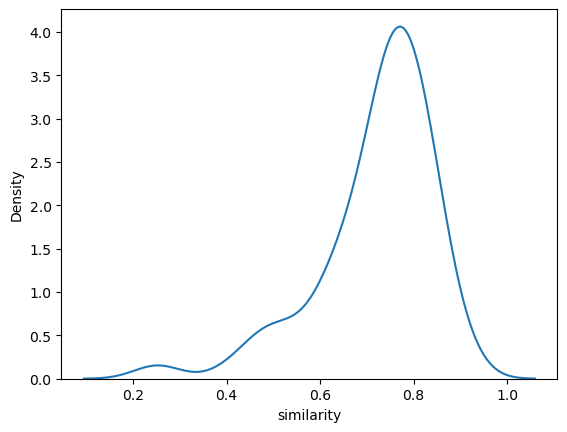

In [669]:
sns.kdeplot(df_sim['similarity'])

In [687]:
prompt_template = """[INST]
You are an expert evaluator for a Retrieval-Augmented Generation (RAG) system.
Your task is to analyze the relevance of the generated answer compared to the original answer provided.
Based on the relevance and similarity of the generated answer to the original answer, you will classify
it as "NON_RELEVANT", "PARTLY_RELEVANT", or "RELEVANT".

Here is the data for evaluation:

Original Answer: {answer}
Generated Question: {question}
Generated Answer: {rag_answer}

Please analyze the content and context of the generated answer in relation to the original
answer and provide your evaluation in parsable JSON without using code blocks:

{{
  "Relevance": "NON_RELEVANT" | "PARTLY_RELEVANT" | "RELEVANT",
  "Explanation": "[Provide a brief explanation for your evaluation]"
}}
[/INST]""".strip()

In [688]:
record = stats_sim[0]

In [689]:
prompt = prompt_template.format(**record)

In [690]:
llm(prompt)

' {\n  "Relevance": "RELEVANT",\n  "Explanation": "The generated answer compares and contrasts multiple methods for predicting a binary response variable, providing a detailed analysis of each method. This is highly relevant to the original answer, which also discusses various factors to consider when choosing between different prediction methods. The generated answer covers most of the key points from the original answer, such as the suitability of Logistic Regression for linear problems and the efficiency of SVM for non-linear problems, albeit in a more generalized manner."\n}'

In [692]:
import json

In [696]:
json_evaluations = []

for i, record in enumerate(auto.tqdm(stats_sim)):
    prompt = prompt_template.format(**record)
    result = llm(prompt)
    json_eval = json.loads(result)
    json_evaluations.append(json_eval)

  0%|          | 0/104 [00:00<?, ?it/s]

In [699]:
df_eval = pd.DataFrame(json_evaluations)

In [700]:
df_eval.Relevance.value_counts()

Relevance
RELEVANT           72
PARTLY_RELEVANT    29
NON_RELEVANT        3
Name: count, dtype: int64

In [703]:
df_sim = pd.concat([df_sim, df_eval], axis=1)

In [707]:
df_sim[df_sim['Relevance'] == 'NON_RELEVANT'][['question', 'answer', 'rag_answer']]

,question,answer,rag_answer
75,Matrix differentiation,"In mathematics, a real-valued function is call...","Based on the context provided, there is no dir..."
78,Why F1-Score is a Harmonic Mean(HM) of Precisi...,"Precision = 0, Recall = 1\r\nAvg = 0.5\r\nF1 =...",I don't have the answer to why F1-Score is a H...
88,What are the confidence intervals of the coeff...,Confidence interval (CI) is a type of interval...,Confidence intervals of the coefficients canno...


In [709]:
df_sim.to_csv('data/data_evaluation.csv')